In [44]:
# Importing the basic libraries
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

np.random.seed(1000)

In [4]:
# Loading the data from the CSV file 
data = pd.read_csv("MultiLabelData.csv",header=None) 

# Visualizing the first 5 rows of the dataframe
data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.983225,0.981488,0.978542,0.975908,0.972962,0.968367,0.965900,0.938807,0.888701,0.862884,...,0.002494,0.012225,0.045861,0.094455,1,0,0,0,1,0
1,0.018160,0.074481,0.369500,0.454558,0.423218,0.379960,0.661803,0.653965,0.666010,0.671838,...,0.005567,0.014649,0.025994,0.024701,1,0,0,0,0,0
2,0.762800,0.791230,0.799371,0.795679,0.779932,0.756109,0.719042,0.877675,0.907015,0.919592,...,0.040818,0.051593,0.057795,0.057418,1,0,0,0,0,0
3,0.758518,0.738699,0.709982,0.686717,0.694709,0.687867,0.461537,0.852653,0.831340,0.798184,...,0.599021,0.068253,0.061698,0.053979,1,0,0,0,1,0
4,0.948445,0.969889,0.965691,0.969223,0.969579,0.966511,0.949118,0.823672,0.853659,0.857751,...,0.001599,0.000875,0.000813,0.003186,1,0,0,0,0,0


## Q3 a

In [5]:
# Separating features (first 294 columns) and labels (last 6 columns)
X = data.iloc[:, :294].values
Y = data.iloc[:, 294:].values 

# Printing the shapes of the features and labels
print(f"Shape of X (features): {X.shape}")
print(f"Shape of Y (labels): {Y.shape}")

Shape of X (features): (2407, 294)
Shape of Y (labels): (2407, 6)


## Q3 b

In [8]:
# Splitting the data into 70% for S1 and 30% remaining for S2 and S3
X_S1, X_t, Y_S1, Y_t = train_test_split(X, Y, test_size=0.3, shuffle=True, random_state=42)

# Split the remaining 30% into 15% each for S2 and S3
X_S2, X_S3, Y_S2, Y_S3 = train_test_split(X_t, Y_t, test_size=0.5, shuffle=True, random_state=42)

# Printing the sizes of the splits
print(f"Shape of S1 (features): {X_S1.shape}, (labels): {Y_S1.shape}")
print(f"Shape of S2 (features): {X_S2.shape}, (labels): {Y_S2.shape}")
print(f"Shape of S3 (features): {X_S3.shape}, (labels): {Y_S3.shape}")

Shape of S1 (features): (1684, 294), (labels): (1684, 6)
Shape of S2 (features): (361, 294), (labels): (361, 6)
Shape of S3 (features): (362, 294), (labels): (362, 6)


## Q3 c

In [9]:
# Function to compute label distributions
def print_label_distributions(Y, name):
    # Summing each label across all samples to get the count of each label
    counts = np.sum(Y, axis=0)
    total = Y.shape[0]
    
    # Calculating percentage distribution for each label
    percentages = (counts / total) * 100
    
    print(f"\nLabel distribution in {name} with {total} samples:")
    for i, percentage in enumerate(percentages):
        print(f"Label y{i+1}: {percentage:.2f}% ")

# Label distributions for S1, S2, and S3
print_label_distributions(Y_S1, "S1")
print_label_distributions(Y_S2, "S2")
print_label_distributions(Y_S3, "S3")



Label distribution in S1 with 1684 samples:
Label y1: 18.11% 
Label y2: 14.67% 
Label y3: 15.80% 
Label y4: 17.40% 
Label y5: 22.09% 
Label y6: 18.82% 

Label distribution in S2 with 361 samples:
Label y1: 17.45% 
Label y2: 15.51% 
Label y3: 16.62% 
Label y4: 19.94% 
Label y5: 23.55% 
Label y6: 16.34% 

Label distribution in S3 with 362 samples:
Label y1: 16.30% 
Label y2: 16.85% 
Label y3: 19.61% 
Label y4: 18.78% 
Label y5: 20.99% 
Label y6: 15.19% 


## Observations
* We can see that the labels are almost equally distributed in each class
* No particular class is therefore present in an overwhelming or underwhelming majority in our dataset, therefore the trained model will not be specifically baised towards a particular class in predicting the output 

## Q3 d, e and f
* Architecture : 1 input layer (294 neurons), 2 hidden layers (120 and 30 neurons) and 1 output layer(6 neurons)
* Loss Function: Binary cross entropy loss with a threshod of 0.5 (Reason : As each output class is independent of each other (assumption))

# **Equations of Backpropagation-**

**Recall:** $W^\ell$ represents the matrix of weights connecting layer $\ell − 1$ to
layer $\ell$.

**Recall:** $δ^\ell$ represents the error gradients with respect to the activations at the layer $\ell$.



# Gradients at the output layer:  

Now, the gradient with respect to weights for output layer would be-

# $\frac{\partial e}{\partial w_{i j}^{L}}=\frac{\partial e}{\partial z_i^{L}} a_j^{L-1}=\frac{\partial e}{\partial a_i^{L}} \phi^{\prime}\left(z_i^{L}\right) a_j^{L-1}$

Collecting these partial derivatives into a matrix we get:

# $\nabla_{W^L} e= \operatorname{Diag}\left({\phi^L}'\right) \delta^L (a^{L-1})^\top$

where

$\delta^L = \begin{bmatrix} \frac{\partial e}{\partial a_1^{L}} \ldots \frac{\partial e}{\partial a_{N_L}^{L}} \end{bmatrix}^\top$.

In code, we have used an equivalent way to represent this:

# $\nabla_{W^L} e=\operatorname{Diag}\left({\phi^L}'\right) \delta^L (a^{L-1})^\top =: \delta^L_z (a^{L-1})^\top$.



Similarly, the gradient with respect to bias at output layer would be-

# $\frac{\partial e}{\partial b_{i}^{L}}=\frac{\partial e}{\partial a_i^{L}} \phi^{\prime}\left(z_i^{L}\right)$

Now, these gradients can be collected into a vector:

# $\nabla_{b^L} e= \operatorname{Diag}\left( \phi^{L'} \right) \delta^L =: \delta_z^L$.



# Gradient in the hidden layer:

The gradient with respect to weights for hidden layers would be-

# $\nabla_{W^{\ell}} e=\operatorname{Diag}\left(\phi^{\ell^{\prime}}\right) \delta^{\ell}\left(a^{\ell-1}\right)^{\top}=\operatorname{Diag}\left(\phi^{\ell^{\prime}}\right) V^{\ell+1} \ldots V^L \delta^L\left(a^{\ell-1}\right)^{\top}$

$\text { where } V^{\ell+1}=\left(W^{\ell+1}\right)^{\top} \operatorname{Diag}\left(\phi^{\ell+1^{\prime}}\right) \text {. }$

In code, we have used an equivalent way to represent this:

$\nabla_{W^{\ell}} e = \operatorname{Diag}\left(\phi^{\ell^{\prime}}\right) \delta^{\ell}\left(a^{\ell-1}\right)^{\top} \\
=\operatorname{Diag}\left(\phi^{\ell^{\prime}}\right) \left(W^{\ell+1}\right)^{\top} \operatorname{Diag}\left(\phi^{\ell+1^{\prime}}\right) \ldots \left(W^{L}\right)^{\top} \operatorname{Diag}\left(\phi^{L^{\prime}}\right) \delta^L\left(a^{\ell-1}\right)^{\top}$.

For the second last layer, we have:

$\nabla_{W^{L-1}} e = \operatorname{Diag}\left(\phi^{{L-1}^{\prime}}\right) \delta^{L-1}\left(a^{L-2}\right)^{\top} \\
=\operatorname{Diag}\left(\phi^{{L-1}^{\prime}}\right) \left(W^{L}\right)^{\top} \operatorname{Diag}\left(\phi^{L^{\prime}}\right) \delta^L\left(a^{L-2}\right)^{\top}\\
= \delta_z^{L-1} \left(a^{L-2}\right)^{\top}
$

where

$\delta_z^{L-1} = \operatorname{Diag}\left(\phi^{{L-1}^{\prime}}\right) \left(W^{L}\right)^{\top} \delta_z^{L}$.


Similarly, for the third last layer we have:

$\nabla_{W^{L-2}} e = \operatorname{Diag}\left(\phi^{{L-2}^{\prime}}\right) \left(W^{L-1}\right)^{\top} \operatorname{Diag}\left(\phi^{{L-1}^{\prime}}\right) \left(W^{L}\right)^{\top} \operatorname{Diag}\left(\phi^{{L}^{\prime}}\right) \delta^{L}\left(a^{L-3}\right)^{\top} \\
= \delta_z^{L-2} \left(a^{L-3}\right)^{\top}
$

where

$\delta_z^{L-2} = \operatorname{Diag}\left(\phi^{{L-2}^{\prime}}\right) \left(W^{L-1}\right)^{\top}  \delta_z^{L-1}$.



And the gradient with respect to bias at hidden layers would be-

# $\nabla_{b^{\ell}} e=\operatorname{Diag}\left(\phi^{\ell^{\prime}}\right) \delta^{\ell}=\operatorname{Diag}\left(\phi^{\ell^{\prime}}\right) V^{\ell+1} \ldots V^L \delta^L$.

In code, we have used an equivalent way to represent this:

$\nabla_{b^{\ell}} e = \operatorname{Diag}\left(\phi^{\ell^{\prime}}\right) \delta^{\ell} \\
=\operatorname{Diag}\left(\phi^{\ell^{\prime}}\right) \left(W^{\ell+1}\right)^{\top} \operatorname{Diag}\left(\phi^{\ell+1^{\prime}}\right) \ldots \left(W^{L}\right)^{\top} \operatorname{Diag}\left(\phi^{L^{\prime}}\right) \delta^L.$

For the second last layer, we have:

$\nabla_{b^{L-1}} e = \operatorname{Diag}\left(\phi^{{L-1}^{\prime}}\right) \left(W^{L}\right)^{\top} \operatorname{Diag}\left(\phi^{L^{\prime}}\right) \delta^L = \operatorname{Diag}\left(\phi^{{L-1}^{\prime}}\right) \left(W^{L}\right)^{\top} \delta^{L}_z = \delta^{L-1}_z$.


For the third last layer, we have:

$\nabla_{b^{L-2}} e = \operatorname{Diag}\left(\phi^{{L-2}^{\prime}}\right) \left(W^{L-1}\right)^{\top} \operatorname{Diag}\left(\phi^{{L-1}^{\prime}}\right) \left(W^{L}\right)^{\top} \operatorname{Diag}\left(\phi^{L^{\prime}}\right) \delta^L = \operatorname{Diag}\left(\phi^{{L-2}^{\prime}}\right) \left(W^{L-1}\right)^{\top} \delta^{L-1}_z = \delta^{L-2}_z$.


In [25]:
class Neural_Network():
    def __init__(self, neurons, Activations, initialization='rand'):
        """Define the NN design parameters
        Args:
            neurons (int array): list of number of neurons in each layer
            Activations (str array): list of activations to be used for hidden and output layers
            initialization (str, optional): Choose weight initialization from
             uniform or normal distribution. Defaults to 'randn'.
        """

        self.inputSize = neurons[0] # Number of neurons in input layer
        self.outputSize = neurons[-1] # Number of neurons in output layer
        self.layers = len(neurons)
        self.weights = [] # weights for each layer
        self.biases = [] # biases in each layer
        self.layer_activations = [] # activations for each layer

        if initialization == 'rand':
            self.initializer = np.random.rand
        elif initialization == 'randn':
            self.initializer = np.random.randn
        else:
           raise ValueError("initialization must be 'rand' or 'randn' or 'he' or 'xavier'")
        for i in range(len(neurons)-1):
            self.weights.append(np.random.randn(neurons[i+1], neurons[i]) * np.sqrt(2. / neurons[i]))
            self.biases.append(np.zeros((neurons[i+1], 1)))  # Initialize biases to zero
            self.layer_activations.append(Activations[i]) # activations for each layer


    def sigmoid(self, z):
        """returns result of the sigmoid activation function on input z."""
        return 1.0/(1.0+np.exp(-z))

    def sigmoidPrime(self,z):
        """returns derivative of sigmoid activation function applied on input z."""
        return self.sigmoid(z)*(1-self.sigmoid(z))

    def ReLU(self,z):
        """returns result of the ReLU activation function on input z."""
        return np.maximum(0, z)

    def ReLUPrime(self,z):
        """returns derivative of ReLU activation function applied on input z."""
        return (z >= 0).astype(int)

    def softmax(self, z):
        """returns result of the softmax activation function on input z."""
        return np.exp(z) / np.sum(np.exp(z), axis=0, keepdims=True)
    
    def softmaxPrime(self, z, y_true):
        """Returns the gradient of the softmax function."""
        softmax_output = self.softmax(z)
        s = softmax_output.reshape(-1, 1)

        # Computing the Jacobian matrix of the softmax
        jacobian = np.diagflat(s) - np.dot(s, s.T)
        return jacobian


    def lossSE(self, predicted, actual):
        """Implementation of Squared-error loss function."""
        return np.mean(0.5*(predicted-actual)**2)

    def lossBCE(self, predicted, actual):
        """Calculates the binary cross-entropy loss."""
        # Convert predicted to a PyTorch tensor if it's a NumPy array
        if isinstance(predicted, np.ndarray):
            predicted = torch.tensor(predicted, dtype=torch.float32)

        # Converting actual to a PyTorch tensor if it's a NumPy array
        if isinstance(actual, np.ndarray):
            actual = torch.tensor(actual, dtype=torch.float32)

        # Clipping the predictions to avoid log(0) errors
        epsilon = 1e-4
        y_pred = torch.clamp(predicted, epsilon, 1.0 - epsilon)

        # Debugging: Print values to track potential NaNs
        if torch.any(torch.isnan(y_pred)):
            print("NaN detected in predicted values after clamping.")
        if torch.any(torch.isnan(actual)):
            print("NaN detected in actual values.")

        # Compute binary cross-entropy for each label
        bce_loss = -(actual * torch.log(y_pred) + (1 - actual) * torch.log(1 - y_pred))
        # Debugging: Check for NaNs in loss calculation
        if torch.any(torch.isnan(bce_loss)):
            print("NaN detected in binary cross-entropy loss.")

        # Returning as a Python float
        return torch.mean(bce_loss).item()  



    def forward(self, x):
        """Defines forward pass of the NN

        Args:
            x (array): input of size self.inputSize

        Returns:
            a (array): output of the forward pass
            layer_dot_prod_z (list): layerwise intermediate outputs
            layer_activations_a (list): layerwise activations
        """

        layer_activations_a = [x] 
        a=x 
        layer_dot_prod_z = []
        for i, param in enumerate(zip(self.biases, self.weights)):
            b, w = param[0], param[1]
            z = np.dot(a, w.T) + b.flatten()
            nan_in_X = np.isnan(z)
            if self.layer_activations[i].lower()=='sigmoid':
                a = self.sigmoid(z)
            elif self.layer_activations[i].lower()=='relu':
                a = self.ReLU(z)
            elif self.layer_activations[i].lower()=='softmax':
                a = self.softmax(z)     
            layer_dot_prod_z.append(z)
            layer_activations_a.append(a)
        return a, layer_dot_prod_z, layer_activations_a

    def backward(self, x, y, zs, activations):
        """backward pass to calculate gradient of loss w.r.t. NN parameters

        Args:
            x (array): input
            y (array): ouputs from forward pass
            zs (list): layerwise intermediate outputs from forward pass
            activations (list): layerwise activations from forward pass

        Returns:
            [tuple]: gradients with respect to bias and weight parameters respectively
        """
        n = zs[-1].shape[0]
        grad_b = [np.zeros(b.shape) for b in self.biases]
        grad_w = [np.zeros(w.shape) for w in self.weights]

        for t in range(1, len(activations)):
            if t == 1:
                delta = (activations[-t] - y)
                if np.isnan(activations[-t]).any():
                    print("NaN detected in delta after backpropagation.")
                    return
            else:
                delta = np.dot(delta, self.weights[-t+1])
                if np.isnan(delta).any():
                    print("NaN detected in delta after backpropagation.")
                    return
                
            if self.layer_activations[-t].lower()=='sigmoid':
                delta *= self.sigmoidPrime(zs[-t])
            elif self.layer_activations[-t].lower()=='relu':
                delta *= self.ReLUPrime(zs[-t])
            elif self.layer_activations[-t].lower()=='softmax':
                delta *= self.softmaxPrime(zs[-t], y)
            else:
                raise ValueError("Activation function not supported")
            grad_b[-t] = (np.sum(delta, axis=0, keepdims=True) / n).T
            grad_w[-t] = (np.dot( activations[-t-1].T, delta) / n).T

        return (grad_b, grad_w)

    def update_parameters(self, grads, lr):
        """update the NN parameters using the gradients

        Args:
            grads (list): gradients obtained from backward pass
            lr (float): learning rate of NN
        """

        grad_b, grad_w = grads[0], grads[1]

        for i in range(len(self.weights)):
            self.weights[i] -= lr * grad_w[i]
            self.biases[i] -= lr * grad_b[i]

    def copy_params(self):
        """Returns a copy of current NN parameters"""
        weights = [w.copy() for w in self.weights]
        biases = [b.copy() for b in self.biases]
        return (weights, biases)
    
    def average_precision(self, y_true, y_pred, k=None):
        """
        Compute the average precision (AP) for a single sample.

        Args:
            y_true (numpy array): Ground truth binary labels (1 for relevant, 0 for irrelevant).
            y_pred (numpy array): Predicted probabilities or scores for each class.
            k (int): The cutoff rank. If None, use the full ranking.

        Returns:
            ap (float): Average precision for the sample.
        """
        # Sorting by predicted probabilities in descending order
        sorted_indices = np.argsort(-y_pred)  
        y_true_sorted = y_true[sorted_indices]

        # If k is specified, evaluate up to the top k results
        if k is not None:
            y_true_sorted = y_true_sorted[:k]

        # Calculate precision at each relevant position
        precisions = []
        num_relevant = 0

        for i in range(len(y_true_sorted)):
            if y_true_sorted[i] == 1:
                num_relevant += 1
                precision_at_i = num_relevant / (i + 1)
                precisions.append(precision_at_i)

        if num_relevant == 0:
            return 0.0  

        return np.mean(precisions) 


    def mean_average_precision(self, y_true_all, y_pred_all, k=None):
        """
        Compute the mean average precision (MAP) across all samples.

        Args:
            y_true_all (numpy array): Ground truth binary labels for all samples.
                                      Shape: (num_samples, num_classes).
            y_pred_all (numpy array): Predicted probabilities or scores for all samples.
                                      Shape: (num_samples, num_classes).
            k (int): The cutoff rank. If None, use the full ranking.

        Returns:
            map_score (float): The mean average precision score.
        """
        aps = []
        num_samples = np.shape(y_true_all)[0]
        for i in range(num_samples):
            ap = self.average_precision(y_true_all[i], y_pred_all[i], k)
            aps.append(ap)
        return np.mean(aps)  # Mean average precision
    
    def error(self, X, Y, errors, map_scores):
        """Appends loss to error list"""
        y = np.squeeze(self.forward(X)[0])
        map_score = self.mean_average_precision(Y, y)
        errors.append(self.loss(y, Y))
        map_scores.append(map_score)

    def train(self, X, Y, lr = 1e-3, max_epochs = 1000, patience=5, batch_size = None,
              n_classes=6, onehotencoded=False, loss_func='BCE', Xval=X_S2, Yval=Y_S2, verbose=True):
        """Function for training our Neural Network

        Args:
            X (ndarray): feature matrix of training data,
             Shape: (n,m) where n is no. of features and m is no. of samples.
            Y (ndarray): ground truth of training data, NOT one-hot-encoded. Shape: (1,m).
            lr (float or function, optional): constant learning rate or scheduler function.
             Defaults to 1e-3 constant lr.
            max_epochs (int, optional): epoch cap for training. Defaults to 1000.
            patience (int, optional): patience parameter for early stopping. Defaults to 5.
            batch_size (int, optional): mini-batch size. Defaults to full-batch GD if not provided.
            n_classes (int, optional): no. of classes for multi-class classification required if
            one-hot encoding is set to True. Defaults to 10.
            onehotencoded (bool, optional): Defaults to False.
            loss_func (str, optional): Choose from 'SE' and 'BCE' loss functions. Defaults to 'SE'.
            Xval (ndarray, optional): Validation data feature matrix. Defaults to None.
            Yval (ndarray, optional): Validation data ground truth. Defaults to None.
            verbose (bool, optional): If True, displays logs and progress of training. Defaults to True.

        Returns:
            [list/tuple]: lists of train-set and validation-set losses seen over the traning process.
        """

        Y = np.expand_dims(Y,0) if len(Y.shape) == 1 else Y
        Yval = np.expand_dims(Yval,0) if (Yval is not None and len(Yval.shape) == 1) else Yval
        
        Y = np.array(Y)

        if loss_func == 'SE':
            self.loss = self.lossSE
        elif loss_func == 'BCE':
            self.loss = self.lossBCE

        train_errors=[]
        MAP_score_train=[]
        if Xval is not None:
            val_errors=[]
            MAP_score_val=[]
        i, j, v = 0, 0, np.inf     
        best_params = self.copy_params()

        if batch_size is not None:
            if batch_size > len(X[0]):
                raise ValueError("invalid mini-batch size. Must be smaller than dataset length")
        else:   
            batch_size = len(X[0])

        # LR control function
        if isinstance(lr, (float, int)):# constant Ir arg is passed to train get_ir lambda x: 1r # we return a function object which returns the same ir at every epoc elif callable(lr): # function in arg is passed to train
           get_lr =lambda X: lr # the function is then used to get in for a particular epoch else: raise ValueError('param Ir can only be a number or a scheduler function")
        elif callable(lr):
          get_lr =lr
        else:
          raise ValueError('param lr can only be a number or a scheduler function')
        
        # Initializig parameters
        p = 5  # Number of epochs to wait for improvement
        min_improvement = 0.001  # Minimum significant improvement for MAP
        best_map = -np.inf  # Initialize best MAP score
        patience_counter = 0  # Counter for epochs without significant improvement

        while i < max_epochs:
            # Shuffling the indices
            idx = np.arange(len(X))  
            np.random.shuffle(idx)   

            # Reordering X and Y using the shuffled indices along the first axis
            X1 = X[idx] 
            Y1 = Y[idx]  

            for q in range(0, len(X1), batch_size):
                start, end = q, min(len(X1), q + batch_size)
                train_x = X1[start:end]  
                train_y = Y1[start:end]  
                out, dot_prod_z, activations_a = self.forward(train_x)
                # Finding the gradients using backward pass
                grads = self.backward(train_x, train_y, dot_prod_z, activations_a) 
                self.update_parameters(grads, lr)
            i += 1 # Incrementing epoch count

            self.error(X, Y, train_errors, MAP_score_train)   
            
            if Xval is not None:
                self.error(Xval, Yval, val_errors, MAP_score_val)  

                if val_errors[-1] < v:
                    j = 0 # Resetting patience counter
                    v = val_errors[-1] # Updating best loss
                    best_params = self.copy_params() # Saving parameters
                else:
                    j += 1 # Incrementing patience counter

            if verbose and i%5 == 0:
                log = f"Epoch {i}..............Loss on train = {train_errors[-1]}"
                if Xval is not None:
                    log += f", Loss on val = {val_errors[-1]}"
                print(log)

            if i >= max_epochs:
                break # Stopping if epoch threshold crossed
            
            current_map_score = MAP_score_train[-1]
            
            # Check for improvement
            if current_map_score > best_map + min_improvement:
                # Updating the best MAP score
                best_map = current_map_score  
                # Resetting counter if improvement is found
                patience_counter = 0  
            else:
                # Incrementing counter if no improvement
                patience_counter += 1  

            # Check if we've reached the stopping condition
            if patience_counter >= p:
                print(f"Stopping early at epoch {i} due to no significant improvement in MAP.")
                print(f"Best MAP achieved: {best_map}")
                break

        if Xval is not None:
            if i >= max_epochs and verbose:
                print("Reached Epoch Cap without convergence....Terminating")
            elif verbose:
                print("Stopping .............. Returning best weights")

            self.weights, self.biases = best_params # reset to best params

        if verbose:
            x = np.arange(1, len(train_errors)+1)
            plt.plot(x, train_errors, label="Loss on Train")
            if Xval is not None:
                plt.plot(x, val_errors, label="Loss on Val")
            plt.legend()
            plt.title(f"{loss_func} - Learning Rate = {lr}")
            plt.xlabel("Epoch")
            plt.ylabel("Loss")
            plt.show()
        if Xval is not None:
            return (train_errors, val_errors, MAP_score_train, MAP_score_val)
        return train_errors, MAP_score_val

    def predict(self, x, thresh = 0.5):
        y_pred_prob = self.forward(x)[0]  
        print(y_pred_prob)
        threshold = np.mean(y_pred_prob)
        print(f"Using mean threshold: {threshold:.4f}")
        y_pred_binary = (y_pred_prob >= thresh).astype(int)
        return y_pred_binary

In [26]:
D_in, H1, H2, D_out = 294, 120, 30, 6 
neurons = [D_in, H1, H2, D_out] # List of number of neurons in the layers sequentially.
activation_functions = ['relu','relu', 'relu','sigmoid'] # Activations in each layer 
nn_bin = Neural_Network(neurons, activation_functions) 

In [48]:
# Combining the training datasets
combined_train = np.concatenate((X_S1, X_S2), axis=0)

# Combining the testing datasets
combined_test = np.concatenate((Y_S1, Y_S2), axis=0)

print("Combined Training Data Shape:", combined_train.shape)
print("Combined Testing Data Shape:", combined_test.shape)

Combined Training Data Shape: (2045, 294)
Combined Testing Data Shape: (2045, 6)


## Q3 g

Training with learning rate: 0.1, batch size: 8
Epoch 5..............Loss on train = 0.1147184744477272, Loss on val = 0.32166221737861633
Stopping early at epoch 7 due to no significant improvement in MAP.
Best MAP achieved: 0.9802157561361837
Stopping .............. Returning best weights


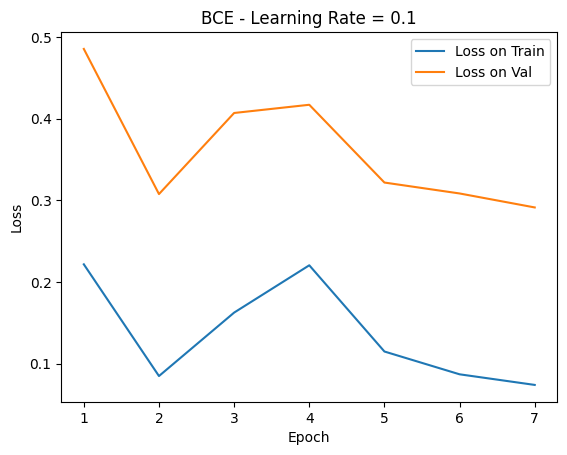

Training with learning rate: 0.1, batch size: 16
Epoch 5..............Loss on train = 0.05985282361507416, Loss on val = 0.2787086069583893
Epoch 10..............Loss on train = 0.05838421732187271, Loss on val = 0.31108665466308594
Epoch 15..............Loss on train = 0.05136645585298538, Loss on val = 0.2974103093147278
Epoch 20..............Loss on train = 0.05176281929016113, Loss on val = 0.3148359954357147
Stopping early at epoch 21 due to no significant improvement in MAP.
Best MAP achieved: 0.9905384006334125
Stopping .............. Returning best weights


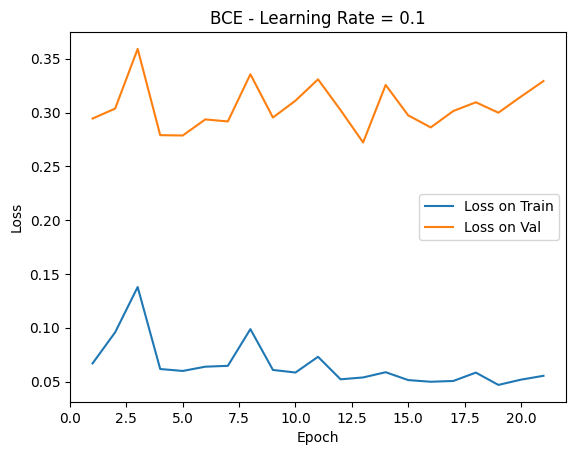

Training with learning rate: 0.1, batch size: 32
Epoch 5..............Loss on train = 0.04731844738125801, Loss on val = 0.29826268553733826
Stopping early at epoch 8 due to no significant improvement in MAP.
Best MAP achieved: 0.9902612826603325
Stopping .............. Returning best weights


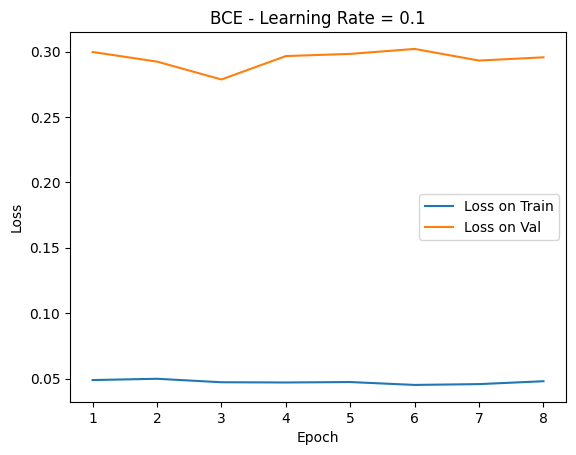

Training with learning rate: 0.01, batch size: 8
Epoch 5..............Loss on train = 0.044303495436906815, Loss on val = 0.29436469078063965
Stopping early at epoch 6 due to no significant improvement in MAP.
Best MAP achieved: 0.990785827395091
Stopping .............. Returning best weights


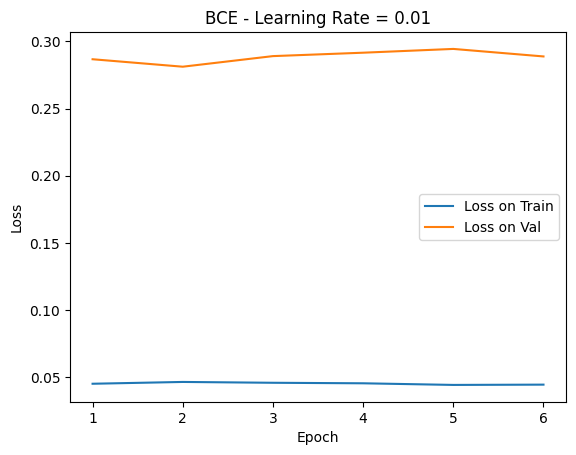

Training with learning rate: 0.01, batch size: 16
Epoch 5..............Loss on train = 0.04444313794374466, Loss on val = 0.28830140829086304
Stopping early at epoch 6 due to no significant improvement in MAP.
Best MAP achieved: 0.9908847980997625
Stopping .............. Returning best weights


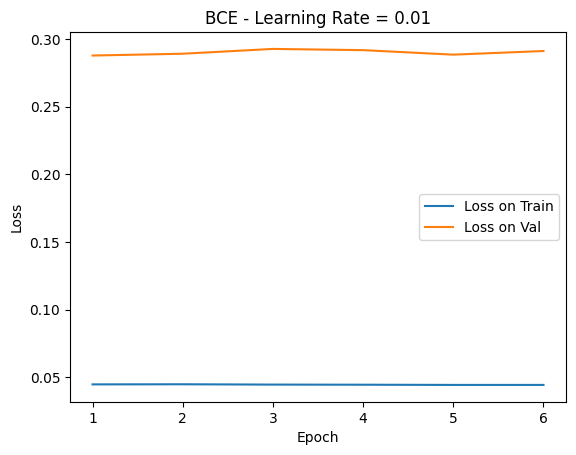

Training with learning rate: 0.01, batch size: 32
Epoch 5..............Loss on train = 0.04443459212779999, Loss on val = 0.28893721103668213
Stopping early at epoch 6 due to no significant improvement in MAP.
Best MAP achieved: 0.9909837688044338
Stopping .............. Returning best weights


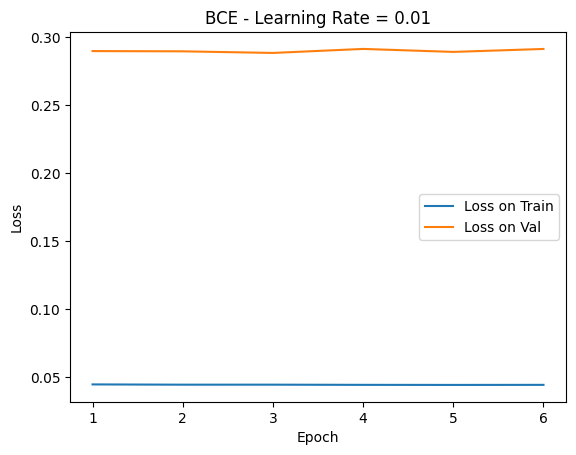

Training with learning rate: 0.001, batch size: 8
Epoch 5..............Loss on train = 0.04452885687351227, Loss on val = 0.29062584042549133
Stopping early at epoch 6 due to no significant improvement in MAP.
Best MAP achieved: 0.9905878859857483
Stopping .............. Returning best weights


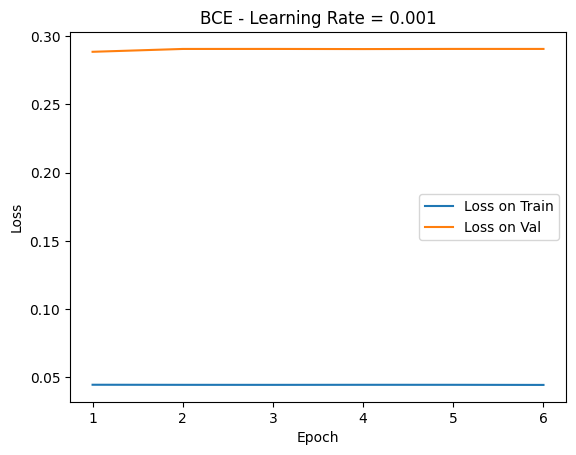

Training with learning rate: 0.001, batch size: 16
Epoch 5..............Loss on train = 0.04449096694588661, Loss on val = 0.2906864285469055
Stopping early at epoch 6 due to no significant improvement in MAP.
Best MAP achieved: 0.9905878859857483
Stopping .............. Returning best weights


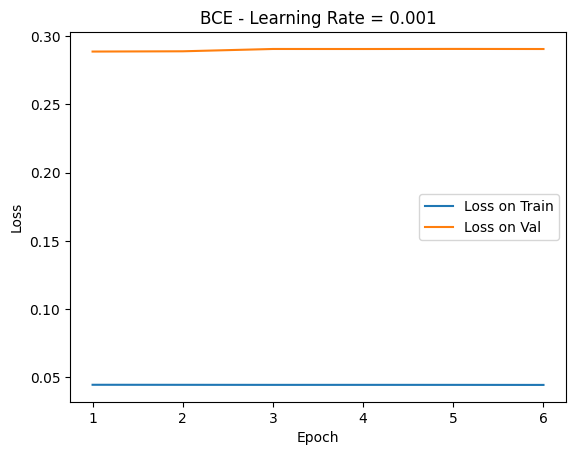

Training with learning rate: 0.001, batch size: 32
Epoch 5..............Loss on train = 0.04450327903032303, Loss on val = 0.290598601102829
Stopping early at epoch 6 due to no significant improvement in MAP.
Best MAP achieved: 0.9905878859857483
Stopping .............. Returning best weights


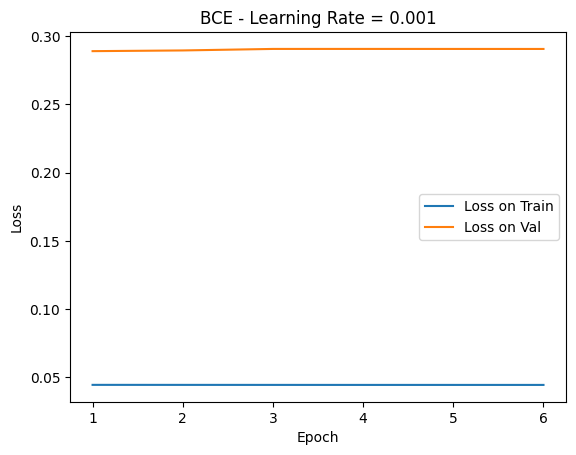

Training with learning rate: 0.0001, batch size: 8
Epoch 5..............Loss on train = 0.04452420398592949, Loss on val = 0.2897804081439972
Stopping early at epoch 6 due to no significant improvement in MAP.
Best MAP achieved: 0.9905878859857483
Stopping .............. Returning best weights


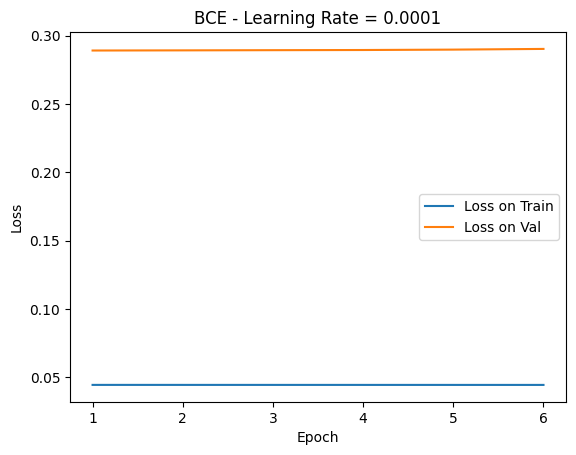

Training with learning rate: 0.0001, batch size: 16
Epoch 5..............Loss on train = 0.044529542326927185, Loss on val = 0.28947123885154724
Stopping early at epoch 6 due to no significant improvement in MAP.
Best MAP achieved: 0.9905878859857483
Stopping .............. Returning best weights


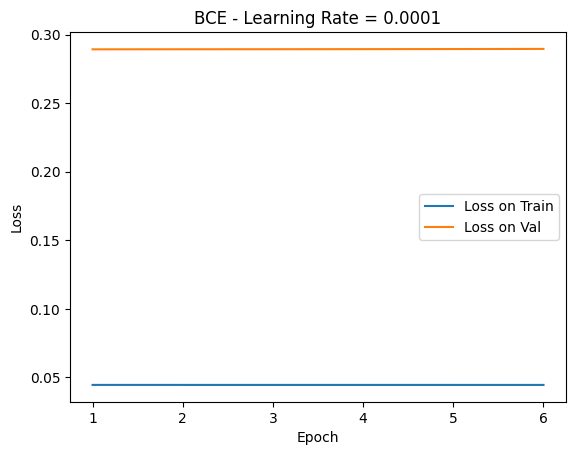

Training with learning rate: 0.0001, batch size: 32
Epoch 5..............Loss on train = 0.04453247785568237, Loss on val = 0.28938907384872437
Stopping early at epoch 6 due to no significant improvement in MAP.
Best MAP achieved: 0.9905878859857483
Stopping .............. Returning best weights


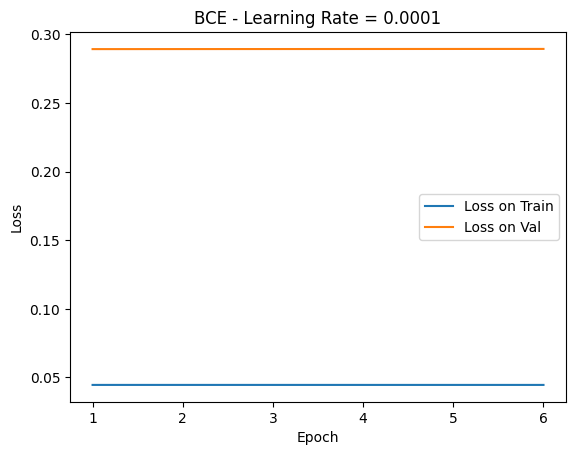

In [51]:
learning_rates = [0.1, 0.01, 0.001, 1e-4]
batch_sizes = [8, 16, 32]

loss_S2 = []
MAP_S2 = []
for lr in learning_rates:
    # Loop through each batch size
    for batch_size in batch_sizes:
        print(f"Training with learning rate: {lr}, batch size: {batch_size}")
        
        # Call the train method and store the losses
        losses_train, losses_val, MAP_train, MAP_val = nn_bin.train(X_S1, Y_S1, batch_size=batch_size, lr=lr, max_epochs=200)
        
        # Store the results for later analysis
        loss_S2.append((lr, batch_size, losses_val))
        MAP_S2.append((lr, batch_size, MAP_val))

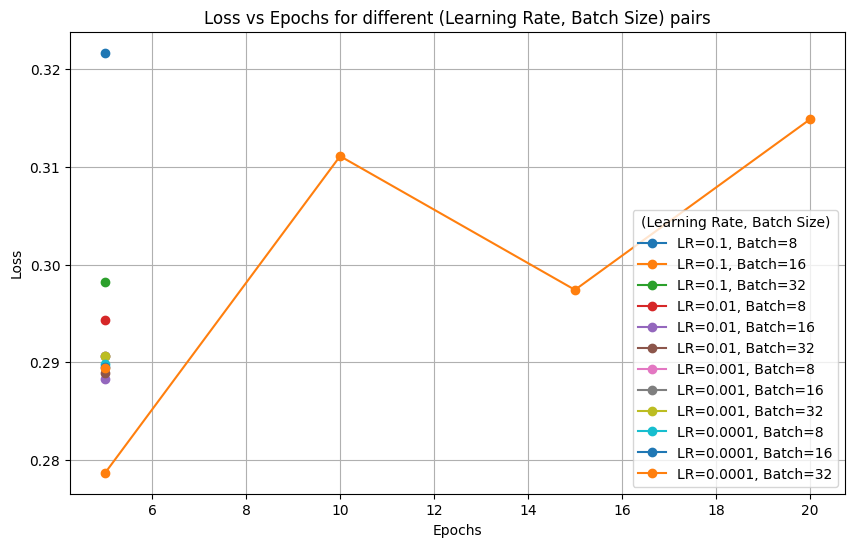

In [52]:
# Function to take every 5th element from the list
def select_every_5th(data):
    return data[4::5]  # Starts at index 4 (5th element) and takes every 5th element

# Plot the loss for each (learning_rate, batch_size) pair
plt.figure(figsize=(10, 6))
for lr, batch, losses in loss_S2:
    # Select every 5th epoch loss
    selected_losses = select_every_5th(losses)
    
    # Epochs for every 5 epochs, assuming the losses list has data for every epoch
    epochs = list(range(5, 5 * (len(selected_losses) + 1), 5))
    
    label = f'LR={lr}, Batch={batch}'
    plt.plot(epochs, selected_losses, label=label, marker='o')

# Customize the plot
plt.title('Loss vs Epochs for different (Learning Rate, Batch Size) pairs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(title="(Learning Rate, Batch Size)")
plt.grid(True)
plt.show()

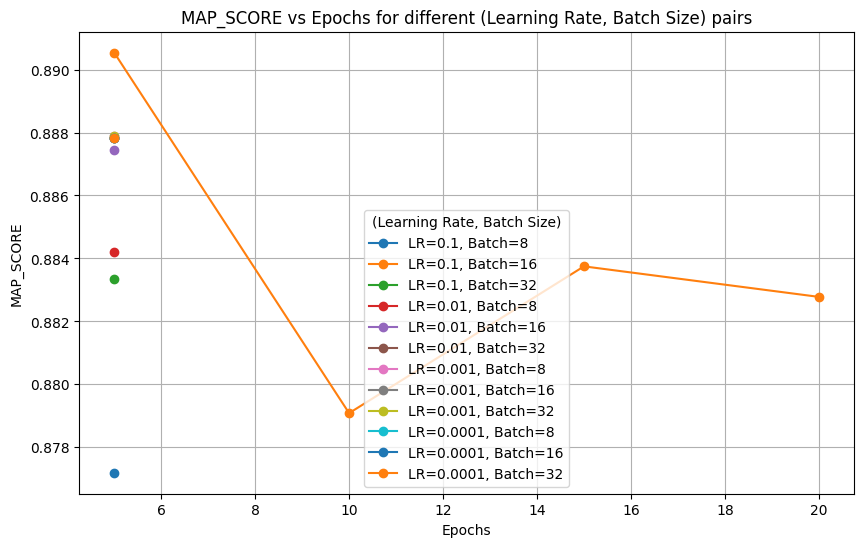

In [53]:
# Function to take every 5th element from the list
def select_every_5th(data):
    return data[4::5]  # Starts at index 4 (5th element) and takes every 5th element

# Plot the loss for each (learning_rate, batch_size) pair
plt.figure(figsize=(10, 6))
for lr, batch, losses in MAP_S2:
    # Select every 5th epoch loss
    selected_losses = select_every_5th(losses)
    
    # Epochs for every 5 epochs, assuming the losses list has data for every epoch
    epochs = list(range(5, 5 * (len(selected_losses) + 1), 5))
    
    label = f'LR={lr}, Batch={batch}'
    plt.plot(epochs, selected_losses, label=label, marker='o')

# Customize the plot
plt.title('MAP_SCORE vs Epochs for different (Learning Rate, Batch Size) pairs')
plt.xlabel('Epochs')
plt.ylabel('MAP_SCORE')
plt.legend(title="(Learning Rate, Batch Size)")
plt.grid(True)
plt.show()

In [55]:
# Choose the epoch to compare (e.g., the last epoch)
epoch = -1  # Index for the last epoch

# Extract the last epoch loss and map scores
losses = [(exp[0], exp[1], exp[2][epoch]) for exp in loss_S2]  # (lr, batch, loss)
maps = [(exp[0], exp[1], exp[2][epoch]) for exp in MAP_S2]      # (lr, batch, map)

# Sort based on loss (ascending order)
sorted_by_loss = sorted(losses, key=lambda x: x[2])  # Sort by loss
sorted_by_map = sorted(maps, key=lambda x: x[2], reverse=True)  # Sort by MAP

# Print best performing pairs
print("Best Performing (Learning Rate, Batch Size) by Loss (Lowest to Highest):")
for lr, batch, loss in sorted_by_loss:
    print(f"LR={lr}, Batch={batch}, Loss={loss}")

print("\nBest Performing (Learning Rate, Batch Size) by MAP (Highest to Lowest):")
for lr, batch, map_score in sorted_by_map:
    print(f"LR={lr}, Batch={batch}, MAP={map_score}")

Best Performing (Learning Rate, Batch Size) by Loss (Lowest to Highest):
LR=0.01, Batch=8, Loss=0.2887682020664215
LR=0.0001, Batch=32, Loss=0.2894202768802643
LR=0.0001, Batch=16, Loss=0.2895674705505371
LR=0.0001, Batch=8, Loss=0.2902882397174835
LR=0.001, Batch=32, Loss=0.2905868887901306
LR=0.001, Batch=16, Loss=0.2906167209148407
LR=0.001, Batch=8, Loss=0.2906193137168884
LR=0.01, Batch=16, Loss=0.29097968339920044
LR=0.01, Batch=32, Loss=0.29110217094421387
LR=0.1, Batch=8, Loss=0.2911662459373474
LR=0.1, Batch=32, Loss=0.2956452965736389
LR=0.1, Batch=16, Loss=0.32929322123527527

Best Performing (Learning Rate, Batch Size) by MAP (Highest to Lowest):
LR=0.1, Batch=8, MAP=0.8908125577100647
LR=0.1, Batch=32, MAP=0.8887349953831949
LR=0.001, Batch=8, MAP=0.8879039704524468
LR=0.0001, Batch=8, MAP=0.8879039704524468
LR=0.001, Batch=16, MAP=0.8878116343490304
LR=0.001, Batch=32, MAP=0.8878116343490304
LR=0.0001, Batch=16, MAP=0.8878116343490304
LR=0.0001, Batch=32, MAP=0.8878116343

In [58]:
rank_by_loss = { (lr, batch): rank+1 for rank, (lr, batch, loss) in enumerate(sorted_by_loss) }
rank_by_map = { (lr, batch): rank+1 for rank, (lr, batch, map_score) in enumerate(sorted_by_map) }

# Calculating weighted rank (equal weightage to both loss and MAP ranks)
weighted_ranks = []
for (lr, batch) in rank_by_loss:
    combined_score = 0.5 * rank_by_loss[(lr, batch)] + 0.5 * rank_by_map[(lr, batch)]
    weighted_ranks.append((lr, batch, combined_score))

# Sorting by the combined score (lower score means higher priority)
sorted_by_combined_score = sorted(weighted_ranks, key=lambda x: x[2])

# Printing results
print("Best Performing (Learning Rate, Batch Size) by Combined Weighted Rank:")
for lr, batch, score in sorted_by_combined_score:
    print(f"LR={lr}, Batch={batch}, Combined Rank Score={score:.2f}")

Best Performing (Learning Rate, Batch Size) by Combined Weighted Rank:
LR=0.0001, Batch=8, Combined Rank Score=4.00
LR=0.01, Batch=8, Combined Rank Score=5.00
LR=0.0001, Batch=32, Combined Rank Score=5.00
LR=0.0001, Batch=16, Combined Rank Score=5.00
LR=0.001, Batch=8, Combined Rank Score=5.00
LR=0.001, Batch=32, Combined Rank Score=5.50
LR=0.001, Batch=16, Combined Rank Score=5.50
LR=0.1, Batch=8, Combined Rank Score=5.50
LR=0.1, Batch=32, Combined Rank Score=6.50
LR=0.01, Batch=16, Combined Rank Score=9.50
LR=0.01, Batch=32, Combined Rank Score=9.50
LR=0.1, Batch=16, Combined Rank Score=12.00


* I used sum of weighted ranks to determine a score to decide piority, since there is no such (learnng rate, batch size) that gives the minimum loss and maximum MAP
* Note here I have used ranks since the loss and MAP values donot differ much across the batches and rates. If that is the case, it is better to use a weighted sum of the normalize values of the functions instead of ranks
* Here I will give an equal weightage to both ranks (0.5 each)
* LR=0.0001 Batch 8 will get the minimum score and is hence chosen as the optimal value

## Q3 h

Epoch 5..............Loss on train = 0.08694130927324295, Loss on val = 0.30754557251930237
Stopping early at epoch 6 due to no significant improvement in MAP.
Best MAP achieved: 0.9727057864710676
Stopping .............. Returning best weights


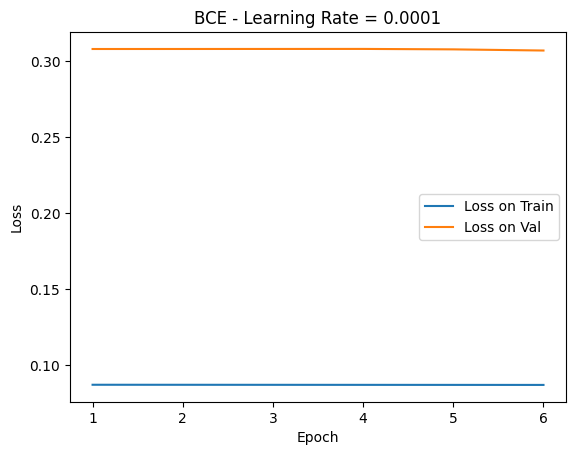

In [70]:
loss_train, loss_val, map_train, map_val = nn_bin.train(combined_train, combined_test, batch_size=8, lr=1e-4, Xval=X_S3, Yval=Y_S3, max_epochs=500)

In [72]:
def average_precision(y_true, y_pred, k=None):
        # Sort by predicted probabilities (highest to lowest)
        sorted_indices = np.argsort(-y_pred)  # sort by score in descending order
        y_true_sorted = y_true[sorted_indices]

        # If k is specified, we only evaluate up to the top k results
        if k is not None:
            y_true_sorted = y_true_sorted[:k]

        # Calculate precision at each relevant position
        precisions = []
        num_relevant = 0

        for i in range(len(y_true_sorted)):
            if y_true_sorted[i] == 1:
                num_relevant += 1
                precision_at_i = num_relevant / (i + 1)
                precisions.append(precision_at_i)

        if num_relevant == 0:
            return 0.0  

        return np.mean(precisions)  # Average precision for this sample


def mean_average_precision(y_true_all, y_pred_all, k=None):
    aps = []
    num_samples = y_true_all.shape[0]

    for i in range(num_samples):
        ap = average_precision(y_true_all[i], y_pred_all[i], k)
        aps.append(ap)

    return np.mean(aps)  

In [73]:
preds = nn_bin.predict(X_S3, 0.25)
print("First 10 predictions:", preds)
map_score = mean_average_precision(Y_S3, preds)
print(f"MAP on test data: {map_score:.4f}")

[[0.         0.         0.97882033 0.         0.         0.        ]
 [0.         0.         0.         0.         0.16809804 0.56295238]
 [0.         0.34405756 0.         0.54962097 0.         0.        ]
 ...
 [0.         1.00180743 0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         1.08223408]
 [0.         0.         0.         0.         0.         0.76051884]]
Using mean threshold: 0.1681
First 10 predictions: [[0 0 1 0 0 0]
 [0 0 0 0 0 1]
 [0 1 0 1 0 0]
 ...
 [0 1 0 0 0 0]
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]]
MAP on test data: 0.8428


* Since the training of the model converged in 6 epochs, We will get only one MAP value for test an train (considering one value after every five epochs), so I haven't plotted it separately. Comparing the printed MAP values will suffice.
* The training MAP is significantly greater than the test MAP, so the model seems to overfit the data

## Q3 i

## Confusion Matrix:


In [74]:

# Define your target names
target_names = ["Class y1", "Class y2", "Class y3", "Class y4", "Class y5", "Class y6"]
# Assuming y_true contains true labels and y_pred contains predicted labels
report = classification_report(Y_S3, preds, target_names=target_names,zero_division=True)  # label_names: list of your 6 labels
print(report)


              precision    recall  f1-score   support

    Class y1       0.68      0.92      0.78        59
    Class y2       0.84      0.89      0.86        61
    Class y3       0.86      0.90      0.88        71
    Class y4       0.79      0.85      0.82        68
    Class y5       0.56      0.71      0.62        76
    Class y6       0.57      0.75      0.65        55

   micro avg       0.71      0.83      0.76       390
   macro avg       0.72      0.84      0.77       390
weighted avg       0.72      0.83      0.77       390
 samples avg       0.77      0.84      0.77       390



From the classification report, we can assess which labels were easier to classify and which were more difficult by analyzing the precision, recall, and F1-score for each class.

* Class y1:

Precision: 0.65, Recall: 0.90, F1-score: 0.76
This class has a high recall but low precision, indicating that the model correctly identifies most of the instances but often misclassifies other classes as y1. It is easier for the model to detect instances of y1, but it struggles with precision.

* Class y2:

Precision: 0.87, Recall: 0.85, F1-score: 0.86
This class has high precision and recall, making it one of the easier classes to classify. The model is both good at detecting y2 and not mistakenly classifying other instances as y2.

* Class y3:

Precision: 0.84, Recall: 0.93, F1-score: 0.88
y3 also has high recall and precision, making it another class that is easily classified. The model performs very well for this class.

* Class y4:

Precision: 0.77, Recall: 0.87, F1-score: 0.81
This class has good recall and precision, though slightly lower compared to y2 and y3. It's reasonably easy to classify.

* Class y5:

Precision: 0.56, Recall: 0.76, F1-score: 0.64
Low precision and recall, making y5 one of the most difficult classes to classify. The model struggles with both identifying instances of y5 (low recall) and misclassifying other instances as y5 (low precision).

* Class y6:

Precision: 0.56, Recall: 0.82, F1-score: 0.66
Similar to y5, y6 also has low precision, but a relatively higher recall, meaning that the model is detecting most instances of y6, but it misclassifies other instances as y6.

Conclusions:
Easiest Classes: y2 and y3 (high precision, recall, and F1-scores)
Most Difficult Classes: y5 and y6 (low precision, lower F1-scores)

## Solution
* We can penalize the loss by associating a higher weight when mistakes are made with respect to predicting labels of y6 and y5 as compared to predicting labels of other classes
* For example use the weights or the respective classes in order 0.1,0.1,0.1,0.1,0.3,0.3 by conditioning the  BCE loss function